# classification using ML models
knn,svm, decision tree, random forest

In [87]:
import yellowbrick
yellowbrick.__version__

'1.3.post1'

In [88]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, learning_curve
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [89]:
import sklearn
sklearn.__version__

'0.22'

In [90]:
df = pd.read_csv("AKAZE_new_features_SRAD_480.csv")
df.head()

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024,views
0,image246,-0.285175,-0.308783,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,2.509623,...,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,-0.237356,-0.195413,-0.229504,PLAX
1,image73,-0.285175,-0.308783,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,-0.331460,...,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,-0.237356,-0.195413,-0.229504,A2c
2,image54,-0.285175,-0.308783,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,-0.331460,...,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,3.322989,-0.195413,-0.229504,A2c
3,image322,-0.285175,-0.308783,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,-0.331460,...,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,-0.237356,-0.195413,-0.229504,PLAX
4,image232,-0.285175,2.081793,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,-0.331460,...,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,-0.237356,-0.195413,-0.229504,A4c


In [91]:
len(df)

480

df = df.replace({"views":  {"PSAX":1,"PLAX":2, "A4c":3,"A2c":4}})
df["views"]

In [92]:
X = df.iloc[:,1:1025]
X.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature1015,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024
0,-0.285175,-0.308783,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,2.509623,-0.230420,...,-0.304349,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,-0.237356,-0.195413,-0.229504
1,-0.285175,-0.308783,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,-0.331460,3.121146,...,-0.304349,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,-0.237356,-0.195413,-0.229504
2,-0.285175,-0.308783,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,-0.331460,-0.230420,...,-0.304349,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,3.322989,-0.195413,-0.229504
3,-0.285175,-0.308783,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,-0.331460,-0.230420,...,-0.304349,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,-0.237356,-0.195413,-0.229504
4,-0.285175,2.081793,-0.289413,-0.209419,-0.333395,-0.229416,-0.235085,-0.253578,-0.331460,-0.230420,...,-0.304349,-0.246319,-0.232623,-0.284747,-0.255584,-0.253578,-0.235085,-0.237356,-0.195413,-0.229504


In [94]:
Y = df["views"]
Y.head()

0    PLAX
1     A2c
2     A2c
3    PLAX
4     A4c
Name: views, dtype: object

In [95]:
x_array = np.array(X)
x_array.shape

(480, 1024)

In [96]:
def plotHistogram(im_features=X, no_clusters=1024):
    x_scalar = np.arange(no_clusters)
    y_scalar = np.array([abs(np.sum(im_features[:,h], dtype=np.int32)) for h in range(no_clusters)])
    plt.bar(x_scalar, y_scalar)
    plt.xlabel("Visual Word Index")
    plt.ylabel("Frequency")
    plt.title("Complete Vocabulary Generated")
    plt.xticks(x_scalar + 0.4, x_scalar)
    plt.savefig("D:/Ratheesha/nit_calicut/MTechsem4/models/ml_model_featureextract/hist_akaze.png")
    plt.show()

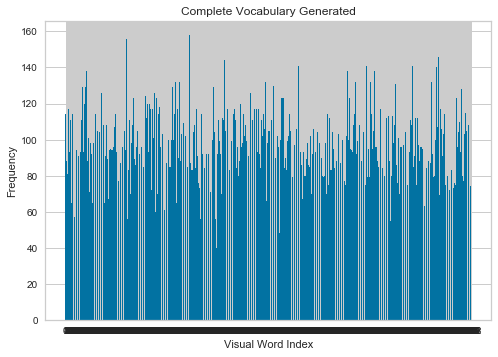

In [97]:
plotHistogram(x_array)

In [98]:
df.groupby(['views']).count()
#Y.count('PLAX')
#Y.count('A2c')
#Y.count('A4c')

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature1015,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024
views,,,,,,,,,,,,,,,,,,,,,
A2c,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
A4c,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
PLAX,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
PSAX,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [100]:
print(len(X_train))
print(len(X_test))

360
120


# svm

In [101]:
parameters = [{'kernel':('linear', 'rbf','poly'), 'degree':[2,3,4,5],'C':[1, 10, 50, 100], 'gamma':[x for x in range(1,100,10)]}]

In [102]:
svc = svm.SVC()
#Fit the model for the data
classifier = GridSearchCV(svc, parameters)
classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)
print(classifier)
# summarize the results of the grid search


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 50, 100], 'degree': [2, 3, 4, 5],
                          'gamma': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                          'kernel': ('linear', 'rbf', 'poly')}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [103]:
print(classifier.best_score_)
print(classifier.best_params_)

1.0
{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}


In [27]:
y_pred

array(['A2c', 'A4c', 'A4c', 'PSAX', 'PSAX', 'PSAX', 'PLAX', 'PSAX',
       'PSAX', 'PSAX', 'A4c', 'A2c', 'PSAX', 'A2c', 'A4c', 'A4c', 'A4c',
       'PLAX', 'A4c', 'PSAX', 'PSAX', 'PLAX', 'PSAX', 'A2c', 'PSAX',
       'A4c', 'A4c', 'PLAX', 'PLAX', 'PSAX', 'PSAX', 'A2c', 'PLAX',
       'PSAX', 'PSAX', 'PSAX', 'A2c', 'A4c', 'PSAX', 'A2c', 'PSAX',
       'PLAX', 'A2c', 'PSAX', 'PLAX', 'PSAX', 'PSAX', 'PSAX', 'PSAX',
       'A4c', 'PSAX', 'PLAX', 'PSAX', 'PLAX', 'PLAX', 'PSAX', 'PLAX',
       'A4c', 'A4c', 'A4c', 'A4c', 'A2c', 'A4c', 'PSAX', 'A2c', 'PSAX',
       'A4c', 'PSAX', 'PSAX', 'PLAX', 'PLAX', 'A2c', 'A2c', 'PSAX',
       'PSAX', 'PSAX', 'PSAX', 'PSAX', 'PSAX', 'A2c', 'A2c', 'PSAX',
       'A4c', 'A4c', 'PSAX', 'A4c', 'A4c', 'PLAX', 'PSAX', 'PSAX', 'PSAX',
       'A2c', 'A2c', 'PSAX', 'A4c', 'PSAX', 'A4c', 'A2c', 'PSAX', 'PSAX',
       'A2c', 'PSAX', 'PSAX', 'A4c', 'PSAX', 'PSAX', 'PSAX', 'PLAX',
       'PLAX', 'A4c', 'A4c', 'PSAX', 'PSAX', 'PLAX', 'PLAX', 'A4c', 'A2c',
       'A2c'

In [28]:
print("no of PLAX :",list(y_pred).count('PLAX')-list(y_test).count('PLAX'))
print("no of PSAX :",list(y_pred).count('PSAX')-list(y_test).count('PSAX'))
print("no of A4C :",list(y_pred).count('A4c')-list(y_test).count('A4c'))
print("no of A2C :",list(y_pred).count('A2c')-list(y_test).count('A2c'))

no of PLAX : -11
no of PSAX : 30
no of A4C : -4
no of A2C : -15


In [29]:
print("no of PLAX :",list(y_test).count('PLAX'))
print("no of PSAX :",list(y_test).count('PSAX'))
print("no of A4C :",list(y_test).count('A4c'))
print("no of A2C :",list(y_test).count('A2c'))

no of PLAX : 31
no of PSAX : 23
no of A4C : 31
no of A2C : 35


In [30]:
y_test

15      A2c
124     A4c
141     A4c
263    PLAX
170     A2c
       ... 
463     A4c
198     A2c
155     A2c
221    PLAX
450    PSAX
Name: views, Length: 120, dtype: object

In [33]:
accuracy_score(y_test, y_pred)

0.75

In [34]:
y_pred_train = classifier.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [35]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[20  0  0 15]
 [ 0 27  0  4]
 [ 0  0 20 11]
 [ 0  0  0 23]]
Accuracy: 60.28 %
Standard Deviation: 4.13 %


In [36]:
print(classification_report(y_test, y_pred,target_names=['A2C','A4C','PLAX','PSAX']))

              precision    recall  f1-score   support

         A2C       1.00      0.57      0.73        35
         A4C       1.00      0.87      0.93        31
        PLAX       1.00      0.65      0.78        31
        PSAX       0.43      1.00      0.61        23

    accuracy                           0.75       120
   macro avg       0.86      0.77      0.76       120
weighted avg       0.89      0.75      0.77       120



In [37]:
from sklearn import metrics
recall_specificity1 = metrics.recall_score(y_test, y_pred, pos_label=0,average='macro')
recall_specificity1

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1317: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.7718894009216589

Learning curve.

A learning curve is a plot of model learning performance over experience or time.

Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves.

There are three common dynamics that you are likely to observe in learning curves; they are:

Underfit.
Overfit.
Good Fit.

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(classifier, "learning curves of svm", X_train, y_train, ylim=None, cv=5,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 9))

from sklearn import metrics
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")
    plt.show()

#plotAUC(y_test,y_pred,"ROC ")

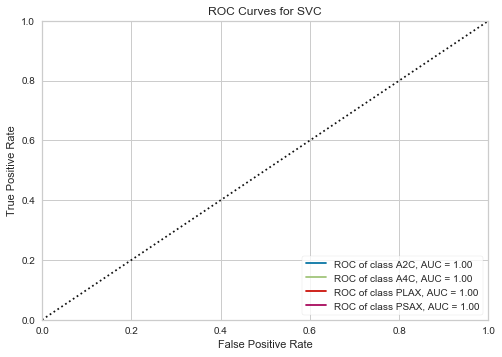

In [47]:
visualizer = ROCAUC(classifier,micro=False,macro=False, classes=['A2C','A4C','PLAX','PSAX'])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show("D:/Ratheesha/nit_calicut/MTechsem4/models/ml_model_featureextract/svc_roccurve_akaze_480.png")
plt.savefig("svc_roccurve_akaze_480")
plt.show()

In [48]:
import seaborn as sns
def bothconfusion_m(cm):
    sns.heatmap(cm, annot=True,fmt='.2f',cmap='Oranges',xticklabels=['A2C','A4C','PLAX','PSAX'],yticklabels=['A2C','A4C','PLAX','PSAX'])
    plt.title("CONFUSION MATRIX FOR VIEW CLASSIFICATION")
    plt.ylim(4.0,0)
    plt.show()
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Oranges',xticklabels=['A2C','A4C','PLAX','PSAX'],yticklabels=['A2C','A4C','PLAX','PSAX'])
    plt.title("NORMALIZED CONFUSION MATRIX FOR RF CLASSIFIER USING AKAZE(%)")
    plt.ylim(4.0,0)
    plt.show()
    

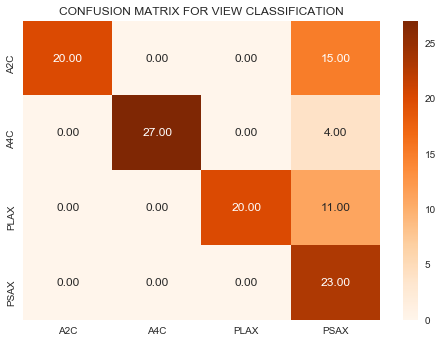

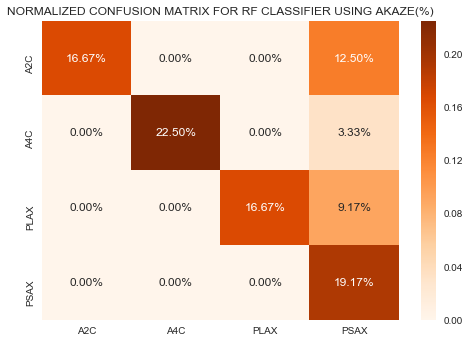

In [49]:
bothconfusion_m(cm)

# DECISION TREE

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt_classifier = DecisionTreeClassifier()#MAX_DEPTH =3

dt_classifier.fit(X_train, y_train)

#Make the prediction
y_pred1 = dt_classifier.predict(X_test)
y_pred1

array(['A2c', 'A4c', 'A4c', 'A2c', 'A2c', 'PSAX', 'PLAX', 'PSAX', 'PSAX',
       'PSAX', 'A4c', 'A2c', 'A4c', 'A2c', 'A4c', 'A4c', 'A4c', 'PLAX',
       'A4c', 'PSAX', 'PLAX', 'PLAX', 'PSAX', 'A2c', 'PSAX', 'A4c', 'A4c',
       'PLAX', 'PLAX', 'PLAX', 'A2c', 'A2c', 'PLAX', 'A2c', 'PLAX',
       'PSAX', 'A2c', 'A4c', 'PSAX', 'A2c', 'PLAX', 'PLAX', 'A2c', 'A2c',
       'PLAX', 'A2c', 'PLAX', 'A2c', 'PSAX', 'A4c', 'PSAX', 'PLAX', 'A4c',
       'PLAX', 'PLAX', 'A2c', 'PLAX', 'A4c', 'A4c', 'A4c', 'A4c', 'A2c',
       'A4c', 'PSAX', 'A2c', 'A2c', 'A4c', 'PSAX', 'PSAX', 'PLAX', 'PLAX',
       'A2c', 'A2c', 'PSAX', 'A2c', 'PSAX', 'A2c', 'A2c', 'A2c', 'A2c',
       'A2c', 'A2c', 'A4c', 'A4c', 'PSAX', 'A4c', 'A4c', 'PLAX', 'PSAX',
       'A2c', 'A4c', 'A2c', 'A2c', 'A2c', 'A4c', 'PLAX', 'PLAX', 'A2c',
       'A4c', 'PLAX', 'A2c', 'PLAX', 'A4c', 'A4c', 'A2c', 'PSAX', 'A2c',
       'PLAX', 'PLAX', 'A4c', 'A4c', 'PSAX', 'PSAX', 'PLAX', 'PLAX',
       'A4c', 'A2c', 'A2c', 'PLAX', 'PSAX'], dtype=obje

In [52]:
y_pred_train1 = dt_classifier.predict(X_train)
print("the training accuracy for view classification : ",accuracy_score(y_train, y_pred_train1))
print("the test accuracy for view classification : ",accuracy_score(y_test, y_pred1))

the training accuracy for view classification :  1.0
the test accuracy for view classification :  0.9583333333333334


In [53]:
recall_specificity1 = metrics.recall_score(y_test, y_pred1, pos_label=0,average='macro')
recall_specificity1

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1317: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.9568723702664796

In [54]:
print(classification_report(y_test, y_pred1,target_names=['A2C','A4C','PLAX','PSAX']))

              precision    recall  f1-score   support

         A2C       0.92      1.00      0.96        35
         A4C       0.97      0.97      0.97        31
        PLAX       0.97      0.90      0.93        31
        PSAX       1.00      0.96      0.98        23

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



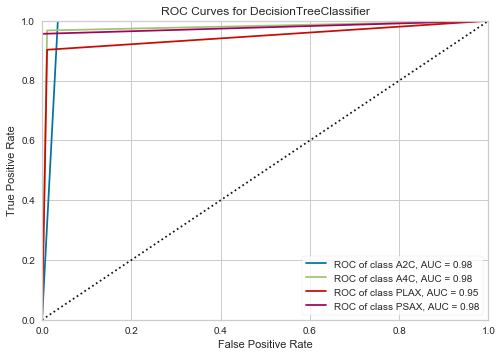

In [56]:
visualizer2 = ROCAUC(dt_classifier,micro=False,macro=False, classes=['A2C','A4C','PLAX','PSAX'])
visualizer2.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)        # Evaluate the model on the test data
visualizer2.show("D:/Ratheesha/nit_calicut/MTechsem4/models/ml_model_featureextract/dt_roccurve_akaze_480")
#plt.savefig()
plt.show()

In [57]:
cm_dt = confusion_matrix(y_test, y_pred1)
print(cm_dt)

[[35  0  0  0]
 [ 0 30  1  0]
 [ 2  1 28  0]
 [ 1  0  0 22]]


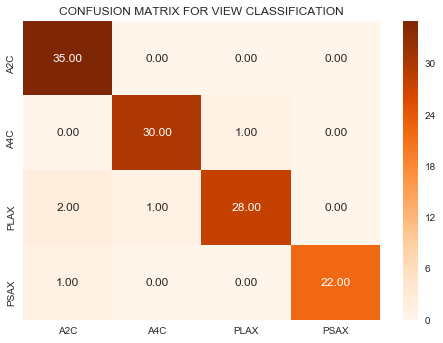

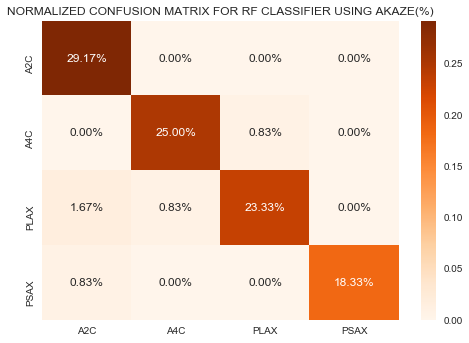

In [58]:
bothconfusion_m(cm_dt)

# RANDOM FOREST CLASSIFIER

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
#Create a Gaussian Classifier
clf_rf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(X_train,y_train)

y_pred_rf=clf_rf.predict(X_test)
y_pred_rf

array(['A2c', 'A4c', 'A4c', 'PLAX', 'A2c', 'PSAX', 'PLAX', 'PSAX', 'PSAX',
       'PSAX', 'A4c', 'A2c', 'A4c', 'A2c', 'A4c', 'A4c', 'A4c', 'PLAX',
       'A4c', 'PSAX', 'PLAX', 'PLAX', 'PSAX', 'A2c', 'PSAX', 'A4c', 'A4c',
       'PLAX', 'PLAX', 'PLAX', 'A2c', 'A2c', 'PLAX', 'PSAX', 'PLAX',
       'PSAX', 'A2c', 'A4c', 'PSAX', 'A2c', 'PLAX', 'PLAX', 'A2c', 'A2c',
       'PLAX', 'A2c', 'PLAX', 'A2c', 'PSAX', 'A4c', 'PSAX', 'PLAX', 'A4c',
       'PLAX', 'PLAX', 'A2c', 'PLAX', 'A4c', 'A4c', 'A4c', 'A4c', 'A2c',
       'A4c', 'PSAX', 'A2c', 'A2c', 'A4c', 'PSAX', 'PSAX', 'PLAX', 'PLAX',
       'A2c', 'A2c', 'PSAX', 'A2c', 'PSAX', 'A2c', 'A2c', 'A2c', 'A2c',
       'A2c', 'A2c', 'A4c', 'A4c', 'PSAX', 'A4c', 'A4c', 'PLAX', 'PSAX',
       'A2c', 'A4c', 'A2c', 'A2c', 'PLAX', 'A4c', 'PLAX', 'A4c', 'A2c',
       'A4c', 'PLAX', 'A2c', 'PLAX', 'PLAX', 'A4c', 'A2c', 'PSAX', 'A2c',
       'PLAX', 'PLAX', 'A4c', 'A4c', 'PSAX', 'PSAX', 'PLAX', 'PLAX',
       'A4c', 'A2c', 'A2c', 'PLAX', 'PSAX'], dtype=o

In [61]:
y_pred_train_rf = clf_rf.predict(X_train)
print("the training accuracy for view classification : ",accuracy_score(y_train, y_pred_train_rf))
print("the test accuracy for view classification : ",accuracy_score(y_test, y_pred_rf))

the training accuracy for view classification :  1.0
the test accuracy for view classification :  1.0


In [62]:
print(classification_report(y_test, y_pred_rf,target_names=['A2C','A4C','PLAX','PSAX']))

              precision    recall  f1-score   support

         A2C       1.00      1.00      1.00        35
         A4C       1.00      1.00      1.00        31
        PLAX       1.00      1.00      1.00        31
        PSAX       1.00      1.00      1.00        23

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [63]:
recall_specificity4 = metrics.recall_score(y_test, y_pred_rf, pos_label=0,average='macro')
recall_specificity4

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1317: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


1.0

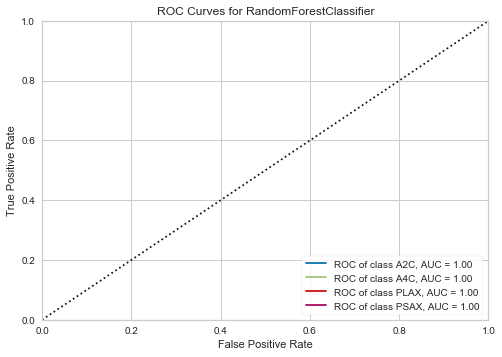

In [64]:
visualizer3 = ROCAUC(clf_rf,micro=False,macro=False, classes=['A2C','A4C','PLAX','PSAX'])
visualizer3.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer3.score(X_test, y_test)        # Evaluate the model on the test data
#plt.figure(figsize=(5,5))
#plt.savefig("D:/Ratheesha/MTechsem4/models/ml_model_featureextract/rf_roccurve_akaze",)
visualizer3.show("D:/Ratheesha/nit_calicut/MTechsem4/models/ml_model_featureextract/rf_roccurve_akaze")
plt.show()


In [65]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[35  0  0  0]
 [ 0 31  0  0]
 [ 0  0 31  0]
 [ 0  0  0 23]]


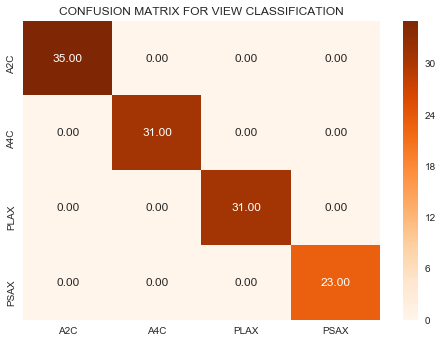

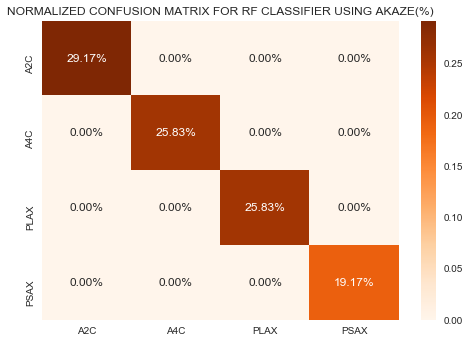

In [66]:
bothconfusion_m(cm_rf)